<span style="color:orange; font-size:40px;">
    <div align=center><b>Tune Hyperparameters</b></div>
</span>

## **Polynomial Regression and Cross-Validation**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_raw = pd.read_csv('../../datasets/Adversiting.csv')
data_raw.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### **Preprocessing Data**

**Dropping ID column**

In [4]:
data = data_raw.drop('ID', axis=1)

**Verify for missing values**

In [5]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Info about dataset**

In [6]:
# data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# statistical description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
# no of columns and rows
data.shape

(200, 4)

### **EDA**

Text(0.5, 1.0, 'Newspaper Distributiion')

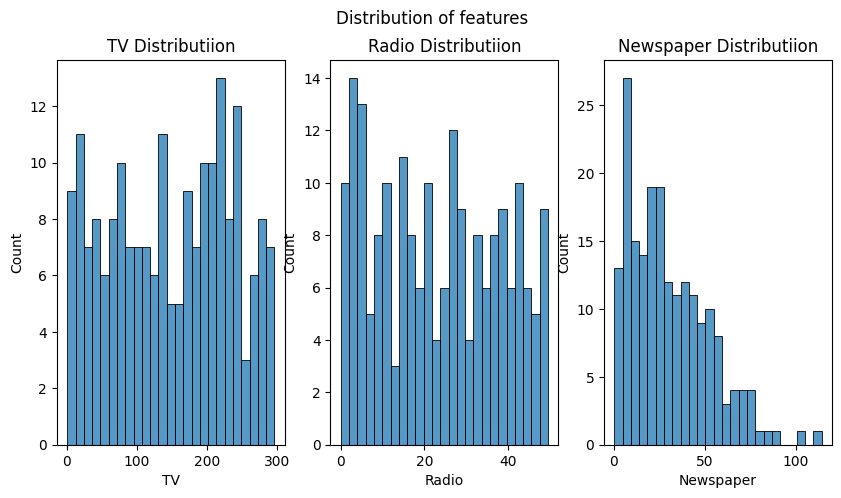

In [17]:
fig, axes = plt.subplots( 1, 3, figsize=(10, 5) )

fig.suptitle('Distribution of features')
sns.histplot( ax=axes[0], data=data, x='TV', bins=25 )
axes[0].set_title('TV Distributiion')
sns.histplot( ax=axes[1], data=data, x='Radio', bins=25 )
axes[1].set_title('Radio Distributiion')
sns.histplot( ax=axes[2], data=data, x='Newspaper', bins=25 )
axes[2].set_title('Newspaper Distributiion')

Only Newspaper features has a skewed distribution

Text(0.5, 1.0, 'Newspaper Distributiion')

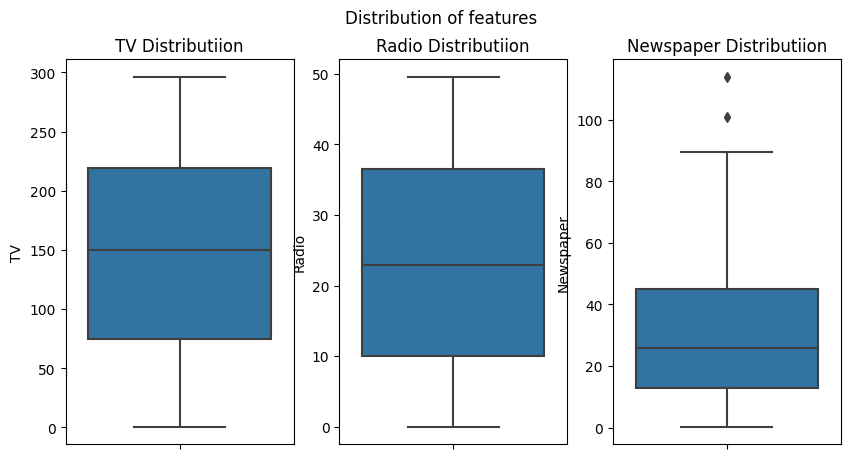

In [21]:
fig, axes = plt.subplots( 1, 3, figsize=(10, 5) )

fig.suptitle('Distribution of features')
sns.boxplot( ax=axes[0], data=data, y='TV' )
axes[0].set_title('TV Distributiion')
sns.boxplot( ax=axes[1], data=data, y='Radio' )
axes[1].set_title('Radio Distributiion')
sns.boxplot( ax=axes[2], data=data, y='Newspaper' )
axes[2].set_title('Newspaper Distributiion')

Text(0.5, 1.0, 'Newspaper Relationship')

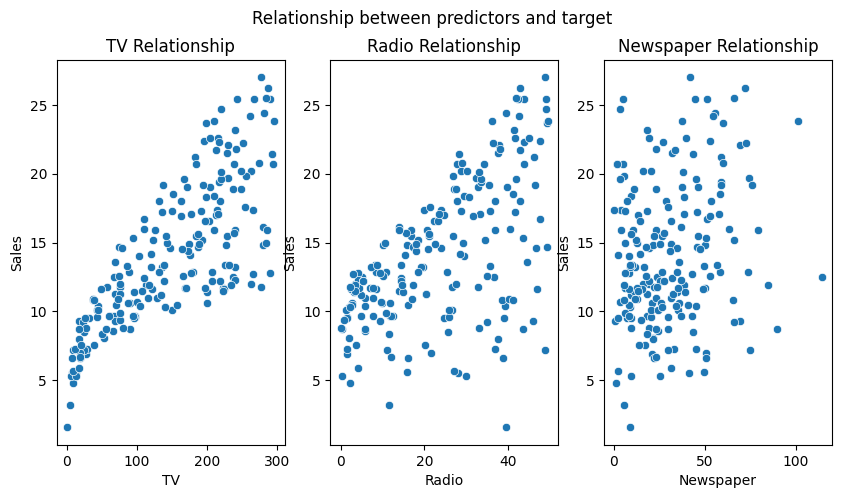

In [18]:
fig, axes = plt.subplots( 1, 3, figsize=(10, 5) )

fig.suptitle('Relationship between predictors and target')
sns.scatterplot( ax=axes[0], data=data, x='TV', y='Sales')
axes[0].set_title('TV Relationship')
sns.scatterplot( ax=axes[1], data=data, x='Radio', y='Sales' )
axes[1].set_title('Radio Relationship')
sns.scatterplot( ax=axes[2], data=data, x='Newspaper', y='Sales' )
axes[2].set_title('Newspaper Relationship')

### **Splitting data into features and target**

In [11]:
X = data.iloc[:, 0:3]
y = data.iloc[:, -1]

### **Cross-Validation and Polynomial Regression**

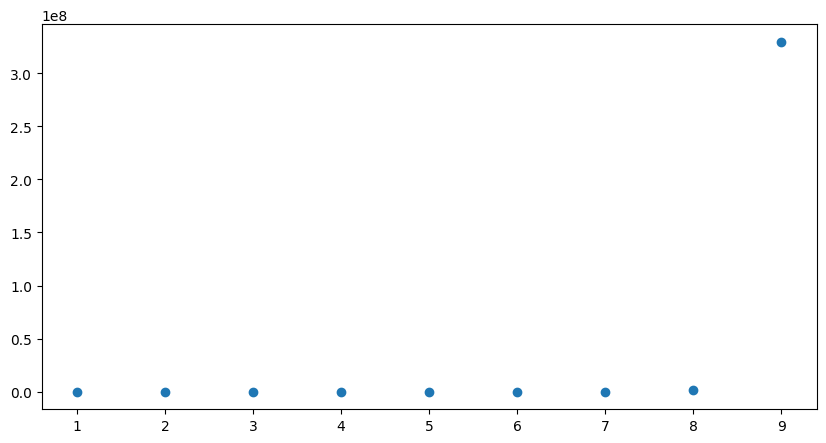

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
cross_val_errors = []

for degree in range(1, max_degree):
    poly_converter = PolynomialFeatures( degree=degree )
    X_poly = poly_converter.fit_transform(X)
    scores = cross_validate( lr, X_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True )
    cross_val_errors.append( np.mean( np.absolute( scores['test_score'] ) ) )
    
fig, ax = plt.subplots( figsize=(10, 5) )
plt.scatter( range(1, max_degree), cross_val_errors )

We can see that the lowest MSE is for degree number 3, so we can train a model with polynomial regression with a degree equal to 3

In [43]:
from sklearn.metrics import mean_squared_error
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat_Test = lr.predict(X_test)
print( mean_squared_error(y_test, y_hat_Test) )

0.6721344417810273


0.978641680255914